In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')  # или 'Qt5Agg' если установлен
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('/Users/konansul/Downloads/Advertising.csv', index_col = 0)

In [3]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


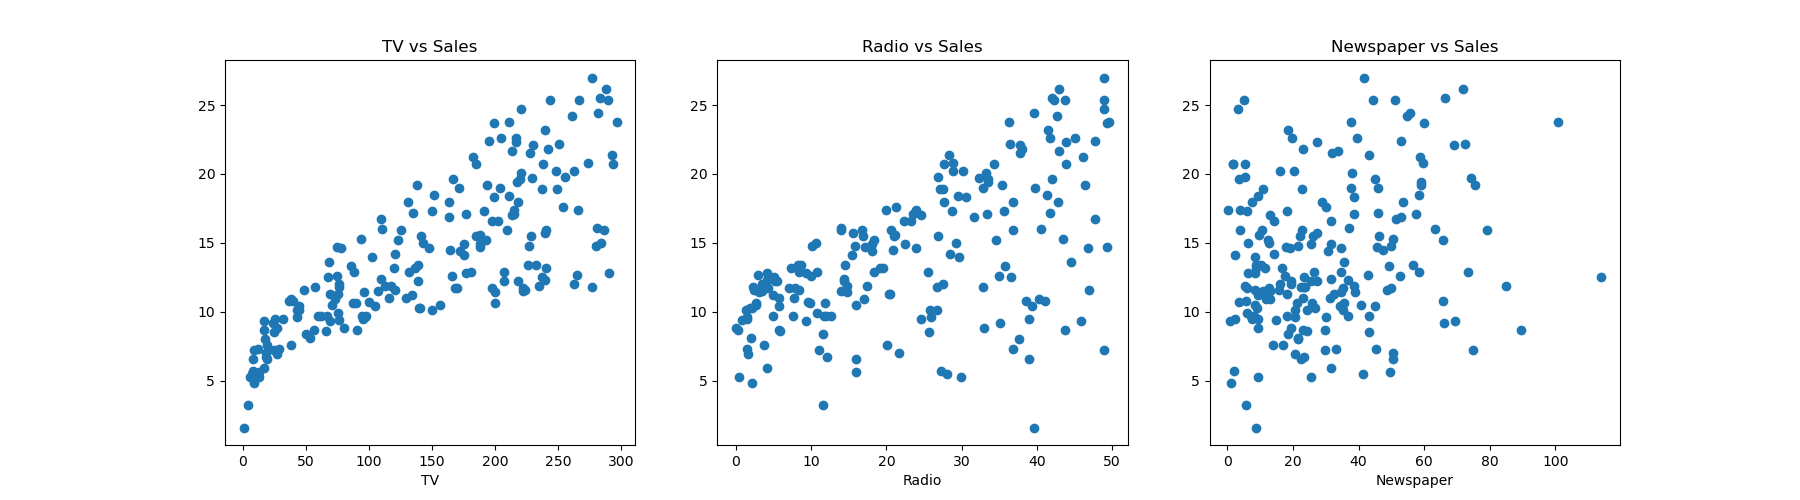

In [5]:
features = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1) 
    plt.scatter(data[feature], data['Sales'])
    plt.xlabel(feature)
    plt.title(f'{feature} vs Sales')
plt.show()

In [6]:
data = data.drop('Newspaper', axis = 1)

In [7]:
data

,TV,Radio,Sales
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9
...,...,...,...
196,38.2,3.7,7.6
197,94.2,4.9,9.7
198,177.0,9.3,12.8
199,283.6,42.0,25.5


In [8]:
X = np.array(data[['TV', 'Radio']])

In [9]:
Y = np.array(data['Sales'])

In [10]:
A = np.linalg.inv(X.T @ X) @ (X.T @ Y)

In [11]:
A

array([0.0548489 , 0.23561216])

In [12]:
x0 = 230.1
x1 = 37.8

y = 0.0548489 * x0 + 0.23561216 * x1

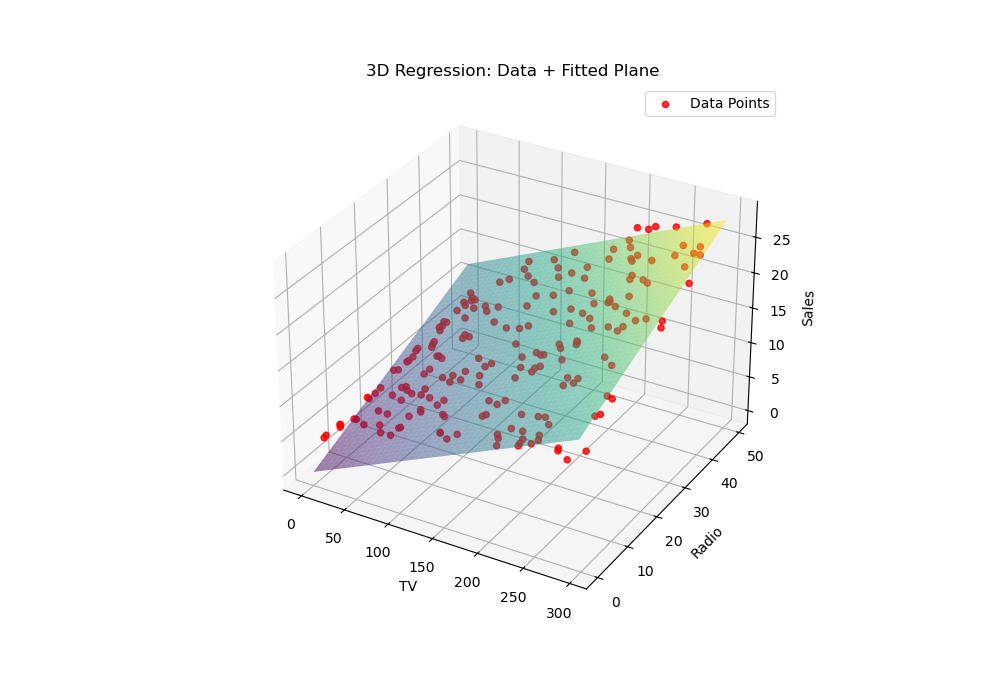

In [13]:
x0 = data['TV'].values      # Feature 1
x1 = data['Radio'].values   # Feature 2
y = data['Sales'].values    # Target

# === Coefficients from regression ===
w0 = 0.0548489
w1 = 0.23561216
b = 0  # if you have intercept, set it here

# === Create grid for the plane ===
x0_range = np.linspace(x0.min(), x0.max(), 50)
x1_range = np.linspace(x1.min(), x1.max(), 50)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)

# Compute the predicted y for the plane
y_grid = w0 * x0_grid + w1 * x1_grid + b

# === Plot ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot the data points
ax.scatter(x0, x1, y, color='red', label='Data Points', alpha=0.8)

# 2. Plot the regression plane
ax.plot_surface(x0_grid, x1_grid, y_grid, alpha=0.5, cmap='viridis')

# Labels and title
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Regression: Data + Fitted Plane')
ax.legend()

plt.show()

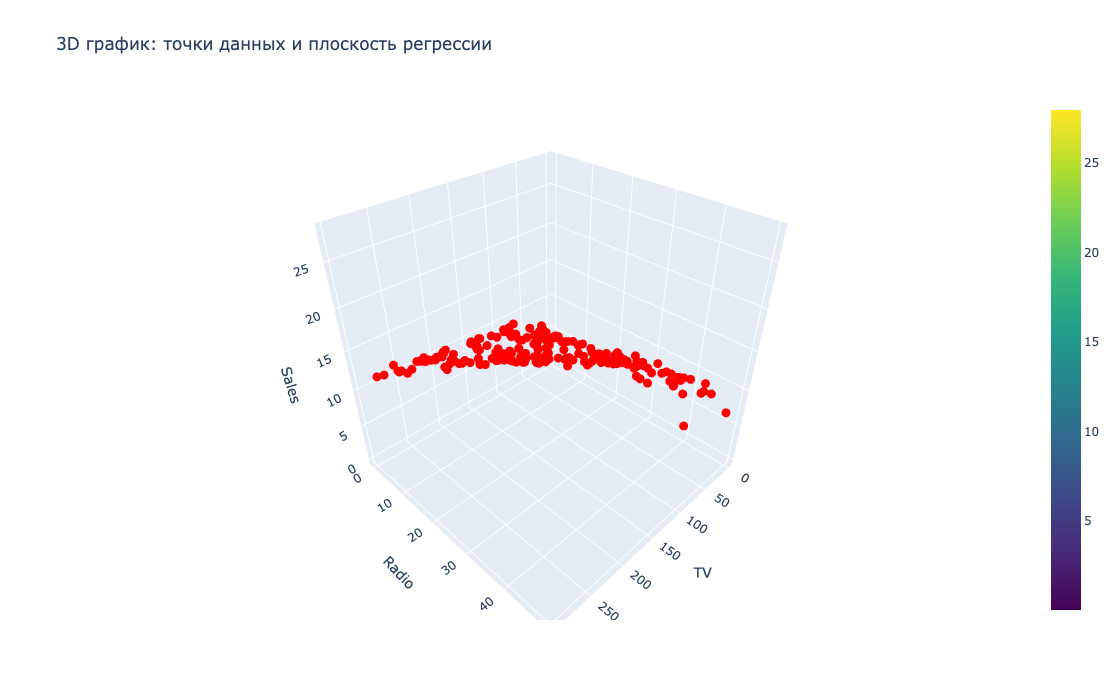

In [16]:
import plotly.graph_objects as go
import numpy as np

# Предположим, что у тебя есть данные из DataFrame df:
x0 = data['TV'].values
x1 = data['Radio'].values
y = data['Sales'].values

# Коэффициенты регрессии (пример)
w0 = 0.0548489
w1 = 0.23561216
b = 0  # если есть свободный член, укажи его здесь

# Создаём сетку для плоскости
x0_grid, x1_grid = np.meshgrid(
    np.linspace(x0.min(), x0.max(), 30),
    np.linspace(x1.min(), x1.max(), 30)
)
y_grid = w0 * x0_grid + w1 * x1_grid + b

# Создаём фигуру
fig = go.Figure()

# Добавляем точки данных
fig.add_trace(go.Scatter3d(
    x=x0, y=x1, z=y,
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Данные'
))

# Добавляем плоскость регрессии
fig.add_trace(go.Surface(
    x=x0_grid, y=x1_grid, z=y_grid,
    opacity=0.5,
    colorscale='Viridis',
    name='Плоскость регрессии'
))

# Настраиваем подписи осей и заголовок
fig.update_layout(
    scene=dict(
        xaxis_title='TV',
        yaxis_title='Radio',
        zaxis_title='Sales'
    ),
    title='3D график: точки данных и плоскость регрессии',
    width=1200,
    height=700
)

fig.show()